## Question 25  
### Modify the optimal policy function only with the border judgement

In [1]:
import numpy as np
import numpy
import random
from numpy.linalg import inv

In [2]:
gamma = 0.8

In [3]:
#create MDP environment
class Environment():
    """
    members: - state set S, 
             - action set A, 
             - w, discount factor, 
              - reward function
             - transition probability matrix PU(100*100), PD(100*100), PL(100*100), PR(100*100).
    """    
    def __init__(self, w, disc):
        self.w = w
        self.disc = disc
        #state set
        self.S = numpy.zeros(shape=(10,10))
        self.S = [[(0.0 + 10.0 * i) for i in range(10)],
                  [(1.0 + 10.0 * i) for i in range(10)],
                  [(2.0 + 10.0 * i) for i in range(10)],
                  [(3.0 + 10.0 * i) for i in range(10)],
                  [(4.0 + 10.0 * i) for i in range(10)],
                  [(5.0 + 10.0 * i) for i in range(10)],
                  [(6.0 + 10.0 * i) for i in range(10)],
                  [(7.0 + 10.0 * i) for i in range(10)],
                  [(8.0 + 10.0 * i) for i in range(10)],
                  [(9.0 + 10.0 * i) for i in range(10)]]

        #action set
        self.A = ['up', 'down', 'left', 'right']
        
        #Transition probability
        PU = numpy.zeros(shape=(100,100))#up transition probability
        PD = numpy.zeros(shape=(100,100))#down transition probability
        PL = numpy.zeros(shape=(100,100))#left transition probability
        PR = numpy.zeros(shape=(100,100))#right transition probability
        
        #row is state at time step t, column is state at time step t+1
        # for agent at edge states
        for i in range(1,9):
            PU[i][i] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for j in range(1,9):
            i = 10*j
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for k in range(1,9):
            i = 9 + k*10
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for n in range(1,9):
            i = 90 + n
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i] = self.w/4.0
        
            
        # for agent at corner states
        PU[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[0][1] = self.w/4.0
        PU[0][10] = self.w/4.0
        PD[0][0] = self.w/4.0 + self.w/4.0
        PD[0][1] = self.w/4.0
        PD[0][10] = 1 - self.w + self.w/4.0 
        PL[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[0][1] = self.w/4.0
        PL[0][10] = self.w/4.0
        PR[0][0] = self.w/4.0 + self.w/4.0
        PR[0][1] = 1 - self.w + self.w/4.0
        PR[0][10] = self.w/4.0
                
        PU[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[9][8] = self.w/4.0
        PU[9][19] = self.w/4.0        
        PD[9][9] = self.w/4.0 + self.w/4.0
        PD[9][8] = self.w/4.0
        PD[9][19] = 1 - self.w + self.w/4.0
        PL[9][9] = self.w/4.0 + self.w/4.0
        PL[9][8] = 1 - self.w + self.w/4.0 
        PL[9][19] = self.w/4.0
        PR[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[9][8]= self.w/4.0
        PR[9][19] = self.w/4.0
           
        PU[90][90] = self.w/4.0 + self.w/4.0
        PU[90][80] = 1 - self.w + self.w/4.0 
        PU[90][91] = self.w/4.0            
        PD[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[90][80] = self.w/4.0
        PD[90][91] = self.w/4.0           
        PL[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[90][80] = self.w/4.0
        PL[90][91] = self.w/4.0           
        PR[90][90] = self.w/4.0 + self.w/4.0
        PR[90][80]= self.w/4.0
        PR[90][91] = 1 - self.w + self.w/4.0 
        
        PU[99][99] = self.w/4.0 + self.w/4.0
        PU[99][89] = 1 - self.w + self.w/4.0 
        PU[99][98] = self.w/4.0         
        PD[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[99][89] = self.w/4.0
        PD[99][98] = self.w/4.0           
        PL[99][99] = self.w/4.0 + self.w/4.0  
        PL[99][89] = self.w/4.0
        PL[99][98] = 1 - self.w + self.w/4.0          
        PR[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[99][89]= self.w/4.0
        PR[99][98] = self.w/4.0
        
        # for other states
        for m in range(1,9):
            for n in range(1,9):
                i = m*10 + n
                PU[i][i-10] = 1 - self.w + self.w/4.0 #^
                PU[i][i-1] = self.w/4.0 #<
                PU[i][i+1] = self.w/4.0 #>
                PU[i][i+10] = self.w/4.0 #!
                PD[i][i-10] = self.w/4.0
                PD[i][i-1] = self.w/4.0
                PD[i][i+1] = self.w/4.0
                PD[i][i+10] = 1 - self.w + self.w/4.0
                PL[i][i-10] = self.w/4.0
                PL[i][i-1] = 1 - self.w + self.w/4.0
                PL[i][i+1] = self.w/4.0
                PL[i][i+10] = self.w/4.0
                PR[i][i-10] = self.w/4.0
                PR[i][i-1] = self.w/4.0
                PR[i][i+1] = 1 - self.w + self.w/4.0
                PR[i][i+10] = self.w/4.0
        
        self.PU = PU
        self.PD = PD
        self.PL = PL
        self.PR = PR
        
        #reward function
        
        reward = [0]*100
        reward[14] = -100
        reward[15] = -100
        reward[16] = -100
        reward[24] = -100
        reward[26] = -100
        reward[34] = -100
        reward[36] = -100
        reward[37] = -100
        reward[38] = -100
        reward[44] = -100
        reward[48] = -100
        reward[54] = -100
        reward[58] = -100
        reward[64] = -100
        reward[68] = -100
        reward[76] = -100
        reward[77] = -100
        reward[78] = -100
        reward[86] = -100
        reward[-1] = 10
        """
        reward = [0]*100
        reward[99] = 1.0
        """
        self.reward = reward

In [4]:
env = Environment(w =0.1,disc = gamma) 

# action 0 is 'up'; action 1 is 'down'; action 2 is 'left'; action 3 is 'right'.

P2 = [[1, 1, 1, 2, 2, 3, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 0, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 1, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 0, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 1, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 2, 3, 1],
      [1, 1, 1, 1, 1, 1, 2, 2, 3, 1],
      [1, 1, 1, 1, 1, 1, 2, 1, 1, 1],
      [3, 3, 3, 1, 1, 1, 1, 1, 1, 1],
      [3, 3, 3, 3, 3, 3, 3, 3, 3, 1]]


In [6]:
import matplotlib.pyplot as plt
import math
 # optimal function# optima 
def value_iteration(env,R):
    #initialization
    V = env.S.copy()
    for i in range(10):
        for j in range(10):
            V[i][j] = 0
    change = math.inf
    
    
    #estimation
    while(change > 0.01):
        change = 0
        for i in range(10):
            for j in range(10):
                v = V[i][j]
                k = i * 10 + j
                sumu = 0
                sumd = 0
                suml = 0
                sumr = 0
                c = 0
                for m in env.PU[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumu = sumu + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PD[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumd = sumd + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PL[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        suml = suml + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PR[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumr = sumr + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                V[i][j] = max(sumd, sumu, sumr, suml)

                change = max(change, abs(v - V[i][j]))
        
    return V
     

In [7]:
 # optimal function# optima 
def value_iteration_modification(env,R,epi):
    #initialization
    V = env.S.copy()
    for i in range(10):
        for j in range(10):
            V[i][j] = 0
    change = math.inf
    
    
    #estimation
    while(change > 0.01):
        change = 0
        for i in range(10):
            for j in range(10):
                v = V[i][j]
                k = i * 10 + j
                sumu = 0
                sumd = 0
                suml = 0
                sumr = 0
                c = 0
                for m in env.PU[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumu = sumu + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PD[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumd = sumd + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PL[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        suml = suml + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PR[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumr = sumr + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                rnd = random.random() 
                if rnd < epi: 
                    V[i][j] = max(sumd, sumu, sumr, suml)
                else:
                    action = [0,1,2,3]
                    values = [sumd, sumu, sumr, suml]
                    action_taken = random.sample(action,1)
                    #print(action_taken)
                    V[i][j] = values[action_taken[0]]
                change = max(change, abs(v - V[i][j]))
        
    return V
     

In [154]:
def out_of_border(state, action):
    if (state%10 == 0):
        return (action == 2)
    elif (state%10 == 9):
        return (action == 3)
    elif (state >= 0 and state <= 9):
        return (action == 0)
    elif (state < 99 and state >= 90):
        return (action == 1)
    else:
        return False

In [157]:
def optimal_policy_m(env,R,V):
    arrow=[[0 for x in range(10)] for y in range(10)]
    for i in range(10):
        for j in range(10):
            v = V[i][j]
            k = i * 10 + j
            sumu = 0
            sumd = 0
            suml = 0
            sumr = 0
            c = 0
            maxnum =0
            for m in env.PU[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumu = sumu + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            #maxnum=sumu
            c = 0
            for m in env.PD[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumd = sumd + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            
            c = 0
            for m in env.PL[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    suml = suml + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            c = 0
            
            for m in env.PR[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumr = sumr + m * (R[c] + env.disc * V[t][z])
                c = c + 1

            action_values = [sumu,sumd,suml,sumr]
            action = np.argmax(action_values)
            if out_of_border(k,action):
                action_values[action] = -9999
                action = np.argmax(action_values)
            arrow[i][j] = action
            
    #print(arrow)
    return arrow
    

In [9]:
def optimal_policy(env,R):
    V=value_iteration(env,R)
    arrow=[[0 for x in range(10)] for y in range(10)]
    for i in range(10):
        for j in range(10):
            v = V[i][j]
            k = i * 10 + j
            sumu = 0
            sumd = 0
            suml = 0
            sumr = 0
            c = 0
            maxnum =0
            for m in env.PU[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumu = sumu + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            maxnum=sumu
            c = 0
            for m in env.PD[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumd = sumd + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            if(sumd>maxnum):
                arrow[i][j]=1
                maxnum=sumd
            
            c = 0
            for m in env.PL[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    suml = suml + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            c = 0
            if(suml>maxnum):
                arrow[i][j]=2
                maxnum=suml
            
            for m in env.PR[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumr = sumr + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            if(sumr>maxnum):
                arrow[i][j]=3
                maxnum=sumr 
    #print(arrow)
    return arrow

In [11]:
from cvxopt import matrix, solvers
def irl(state_num, PU, PD, PL, PR , lambda_num, discount, Rmax, policy):
    """
    - state_num: number of state = 100;
    - PU, PD, PL, PR: four transition probability matrix 100*100;
    - lambda_num: adjustable pernalty coefficient;
    - discount: disc;
    - Rmax: max value in T_rewardf;
    - policy: policy function 10*10, values should be in [0, 1, 2, 3];
    
     should return the estimated reward function of ground truth reward function 1 or 2.
    
    """
    # change reward function dimension to 100*1
    policy = np.reshape(policy,(100,1))
    #print(policy[1])
    
    #action set
    A = [0, 1, 2, 3]
    
    # transfer four transition probability matrix to a three dimension probability tensor 
    P = [[[0]*100]*100]*4
    P[0] = PU
    P[1] = PD
    P[2] = PL
    P[3] = PR
    #P = np.asarray(P)
    #print(P[3][5])
    
    # a handle for numtiplication in P.
    def multiply(state, other_action):
        #print(state)
        #policy_action = policy[state][0]
        policy_action = int(policy[state])
        mul = - np.dot(P[policy_action][state] - P[other_action][state]
        ,inv(np.eye(state_num) - discount * P[policy_action]))
        #print(mul)
        return mul
    
    # D inclusing following parts: [D00 D01 D02]
    #                              [D10 D11 D12]
    #                              [D20 D21 D22]
    #                              [D30 D31 D32]
    #                              [D40 D41 D42]
    #                              [D50 D51 D52]
    
    #D00 (300*100)
    D00 = np.vstack([multiply(s, a)] for s in range(100) for a in [element for element in A if element!=policy[s][0]])
    D01 = np.vstack([np.eye(1, 100, s) for s in range(100) for a in [element for element in A if element!=policy[s][0]]])
    D02 = np.zeros((300, 100))
    #D03 = np.zeros((300, 100))
    
    D0 = np.hstack((D00, D01, D02))
    
    
    D10 = np.vstack([multiply(s, a)] for s in range(100) for a in [element for element in A if element!=policy[s][0]])    
    D11 = np.zeros((300, 100))
    D12 = np.zeros((300, 100))
    #D13 = np.zeros((300, 100))
    
    D1 = np.hstack((D10, D11, D12))
    
    D20 = np.eye(100 , 100)
    D21 = np.zeros((100, 100))
    D22 = - np.eye(100 , 100)
    #D23 = np.zeros((100, 100))
      
    D2 = np.hstack((D20, D21, D22))
    
    D30 = - np.eye(100 , 100)
    D31 = np.zeros((100, 100))
    D32 = - np.eye(100 , 100)
    #D33 = np.zeros((100, 100))
      
    D3 = np.hstack((D30, D31, D32))
    
    D40 = np.eye(100 , 100)
    D41 = np.zeros((100, 100))
    D42 = np.zeros((100, 100))
    #D43 = - Rmax * np.eye(100 , 100)
      
    D4 = np.hstack((D40, D41, D42))
        
    D50 = - np.eye(100 , 100)
    D51 = np.zeros((100, 100))
    D52 = np.zeros((100, 100))
    #D53 = - Rmax * np.eye(100 , 100)
      
    D5 = np.hstack((D50, D51, D52))  
        
    D = np.vstack((D0, D1, D2, D3, D4, D5))
    #print(D.shape)
    CT = -np.hstack((np.zeros(100), np.ones(100), -lambda_num * np.ones(100)))
    
    b = np.zeros((800, 1))
    bmax = Rmax * np.ones(200)
    b = np.append(b, bmax)
    #print(b.shape)
    
    D = matrix(D)
    CT = matrix(CT)
    b = matrix(b)
    sol=solvers.lp(CT,D,b)
    r = np.asarray(sol["x"][:100], dtype=np.double)
    #print(len(sol['x']))
    return r.reshape((100,))
    #return sol['x'][:100]

In [16]:
def s_range(start, end, step):
    while start <= end:
        yield start
        start += step

accuracy = []
for i in s_range(0, 5, 0.01):
    print(i)
    R = irl(100, env.PU, env.PD, env.PL, env.PR , i, gamma, 100, P2) 
    arrow = optimal_policy(Environment(w=0.1,disc=gamma),R,0)
    P = np.asarray(P2)
    acc = np.sum(arrow == P)
    accuracy = np.append(accuracy, acc/100)

print(accuracy)

0
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  2.3437e+01 -2.1139e+04  2e+04  2e-02  2e+01  2e+00
 2:  3.9067e+01 -1.5687e+04  2e+04  1e-02  1e+01  3e+00
 3: -4.5156e+01 -7.1241e+03  9e+03  6e-03  5e+00  3e+00
 4: -3.8990e+02 -4.0974e+03  5e+03  3e-03  3e+00  3e+00
 5: -1.6667e+03 -5.6357e+03  9e+03  3e-03  3e+00  5e+00
 6: -2.1817e+03 -6.1237e+03  1e+04  3e-03  3e+00  6e+00
 7: -3.2758e+03 -5.7861e+03  8e+03  2e-03  2e+00  5e+00
 8: -4.2184e+03 -5.7268e+03  6e+03  1e-03  1e+00  4e+00
 9: -4.2513e+03 -5.5006e+03  5e+03  1e-03  9e-01  4e+00
10: -4.9769e+03 -5.4492e+03  2e+03  4e-04  3e-01  2e+00
11: -5.1688e+03 -5.4469e+03  1e+03  2e-04  2e-01  1e+00
12: -5.2332e+03 -5.4506e+03  1e+03  2e-04  2e-01  9e-01
13: -5.3787e+03 -5.4837e+03  5e+02  8e-05  8e-02  5e-01
14: -5.3813e+03 -5.4815e+03  5e+02  8e-05  7e-02  4e-01
15: -5.4715e+03 -5.5071e+03  2e+02  3e-05  3e-02  2e-01
16: -5.5074e+03 -5.5165e+03  5e+01  7e-06  7e-03

22: -5.1057e+03 -5.1057e+03  1e-04  3e-11  2e-08  1e-07
Optimal solution found.
0.060000000000000005
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.0498e+01 -2.1077e+04  2e+04  2e-02  2e+01  2e+00
 2:  6.0797e+01 -1.5583e+04  2e+04  1e-02  1e+01  3e+00
 3: -3.7134e+00 -7.0639e+03  9e+03  6e-03  5e+00  3e+00
 4: -2.9783e+02 -3.6628e+03  5e+03  3e-03  2e+00  2e+00
 5: -1.4572e+03 -5.3823e+03  9e+03  3e-03  3e+00  5e+00
 6: -1.8772e+03 -5.7538e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.8366e+03 -5.3720e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.6871e+03 -5.2260e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.9344e+03 -4.9989e+03  4e+03  9e-04  8e-01  3e+00
10: -4.5755e+03 -4.9719e+03  2e+03  3e-04  3e-01  1e+00
11: -4.7595e+03 -4.9738e+03  9e+02  2e-04  2e-01  7e-01
12: -4.8487e+03 -4.9884e+03  6e+02  1e-04  1e-01  5e-01
13: -4.8985e+03 -4.9891e+03  4e+02  7e-05  6e-02  3e-01
14: -4.9530e+03 -5.0041e+03  2e+02  4e-05  4e-02  2e-01
15: -

22: -4.6578e+03 -4.6578e+03  3e-04  5e-11  5e-08  3e-07
Optimal solution found.
0.11999999999999998
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.7247e+01 -2.1014e+04  2e+04  2e-02  1e+01  2e+00
 2:  8.1296e+01 -1.5480e+04  2e+04  1e-02  1e+01  3e+00
 3:  3.2864e+01 -6.9832e+03  8e+03  6e-03  5e+00  3e+00
 4: -2.1582e+02 -3.4284e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.2723e+03 -5.0580e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.6239e+03 -5.3531e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.4787e+03 -4.9744e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.2378e+03 -4.7866e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.5702e+03 -4.6425e+03  4e+03  9e-04  8e-01  3e+00
10: -4.1088e+03 -4.5769e+03  2e+03  4e-04  3e-01  1e+00
11: -4.3197e+03 -4.5571e+03  1e+03  2e-04  2e-01  7e-01
12: -4.4231e+03 -4.5511e+03  5e+02  1e-04  9e-02  5e-01
13: -4.4787e+03 -4.5597e+03  3e+02  6e-05  6e-02  3e-01
14: -4.5404e+03 -4.5744e+03  1e+02  3e-05  2e-02  1e-01
15: -4

0.18000000000000002
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.3707e+01 -2.0952e+04  2e+04  2e-02  1e+01  2e+00
 2:  9.9899e+01 -1.5456e+04  2e+04  1e-02  1e+01  3e+00
 3:  6.5476e+01 -6.9152e+03  8e+03  6e-03  5e+00  3e+00
 4: -1.4562e+02 -3.2934e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.0955e+03 -4.6631e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.3855e+03 -4.8540e+03  9e+03  3e-03  2e+00  5e+00
 7: -2.1695e+03 -4.5710e+03  7e+03  2e-03  2e+00  5e+00
 8: -2.8208e+03 -4.3651e+03  5e+03  1e-03  1e+00  4e+00
 9: -3.1167e+03 -4.2437e+03  4e+03  9e-04  8e-01  3e+00
10: -3.6535e+03 -4.1587e+03  2e+03  4e-04  4e-01  2e+00
11: -3.9445e+03 -4.1487e+03  8e+02  2e-04  1e-01  7e-01
12: -4.0555e+03 -4.1512e+03  4e+02  8e-05  7e-02  3e-01
13: -4.1119e+03 -4.1584e+03  2e+02  4e-05  3e-02  2e-01
14: -4.1291e+03 -4.1586e+03  1e+02  2e-05  2e-02  1e-01
15: -4.1567e+03 -4.1649e+03  3e+01  7e-06  6e-03  3e-02
16: -4.1629e+03 -4.1662e+03  1

0.25000000000000006
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.0904e+01 -2.0881e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.1992e+02 -1.5430e+04  2e+04  1e-02  1e+01  3e+00
 3:  9.8556e+01 -6.7991e+03  8e+03  6e-03  5e+00  3e+00
 4: -8.4168e+01 -3.1610e+03  4e+03  2e-03  2e+00  2e+00
 5: -8.1748e+02 -4.0320e+03  7e+03  3e-03  2e+00  3e+00
 6: -1.5109e+03 -4.1570e+03  7e+03  2e-03  2e+00  4e+00
 7: -1.7401e+03 -4.0770e+03  7e+03  2e-03  2e+00  4e+00
 8: -2.4848e+03 -3.8799e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.8529e+03 -3.8017e+03  4e+03  8e-04  7e-01  3e+00
10: -3.1881e+03 -3.6656e+03  2e+03  4e-04  3e-01  1e+00
11: -3.4739e+03 -3.6882e+03  8e+02  2e-04  1e-01  7e-01
12: -3.6258e+03 -3.6964e+03  3e+02  6e-05  5e-02  2e-01
13: -3.6849e+03 -3.7077e+03  9e+01  2e-05  2e-02  8e-02
14: -3.7035e+03 -3.7108e+03  3e+01  6e-06  5e-03  3e-02
15: -3.7104e+03 -3.7127e+03  9e+00  2e-06  2e-03  9e-03
16: -3.7131e+03 -3.7133e+03  1

21: -3.3401e+03 -3.3401e+03  6e-06  1e-12  1e-09  6e-09
Optimal solution found.
0.3200000000000001
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.7763e+01 -2.0809e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.3835e+02 -1.5404e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.2726e+02 -6.6491e+03  8e+03  5e-03  5e+00  3e+00
 4: -3.7631e+01 -3.0392e+03  4e+03  2e-03  2e+00  2e+00
 5: -6.0194e+02 -3.4492e+03  5e+03  2e-03  2e+00  3e+00
 6: -1.1655e+03 -3.4946e+03  6e+03  2e-03  2e+00  3e+00
 7: -1.5278e+03 -3.5001e+03  5e+03  2e-03  1e+00  3e+00
 8: -2.0439e+03 -3.4657e+03  4e+03  1e-03  1e+00  3e+00
 9: -2.3573e+03 -3.3545e+03  4e+03  8e-04  7e-01  2e+00
10: -2.6258e+03 -3.2722e+03  2e+03  5e-04  4e-01  2e+00
11: -2.9777e+03 -3.2674e+03  1e+03  2e-04  2e-01  8e-01
12: -3.1465e+03 -3.2735e+03  5e+02  1e-04  9e-02  4e-01
13: -3.2403e+03 -3.2698e+03  1e+02  2e-05  2e-02  1e-01
14: -3.2614e+03 -3.2750e+03  5e+01  1e-05  9e-03  5e-02
15: -3.

0.3900000000000002
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.4310e+01 -2.0738e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.5538e+02 -1.5377e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.5233e+02 -6.4707e+03  8e+03  5e-03  4e+00  2e+00
 4: -1.5018e+00 -2.9179e+03  4e+03  2e-03  2e+00  1e+00
 5: -3.6014e+02 -2.9025e+03  4e+03  2e-03  2e+00  2e+00
 6: -9.4630e+02 -2.9373e+03  4e+03  2e-03  1e+00  2e+00
 7: -1.3169e+03 -3.0616e+03  5e+03  1e-03  1e+00  3e+00
 8: -1.7003e+03 -3.0468e+03  4e+03  1e-03  9e-01  3e+00
 9: -1.9529e+03 -2.9157e+03  3e+03  8e-04  6e-01  2e+00
10: -2.2057e+03 -2.8549e+03  2e+03  5e-04  4e-01  2e+00
11: -2.5916e+03 -2.8199e+03  9e+02  2e-04  2e-01  7e-01
12: -2.7028e+03 -2.8297e+03  5e+02  1e-04  8e-02  4e-01
13: -2.8144e+03 -2.8476e+03  1e+02  3e-05  2e-02  1e-01
14: -2.8363e+03 -2.8516e+03  6e+01  1e-05  1e-02  6e-02
15: -2.8484e+03 -2.8536e+03  2e+01  4e-06  3e-03  2e-02
16: -2.8522e+03 -2.8544e+03  8e

17: -2.4990e+03 -2.4995e+03  2e+00  4e-07  3e-04  2e-03
18: -2.4995e+03 -2.4996e+03  3e-01  6e-08  4e-05  3e-04
19: -2.4996e+03 -2.4996e+03  1e-01  3e-08  3e-05  1e-04
20: -2.4996e+03 -2.4996e+03  5e-03  1e-09  8e-07  5e-06
21: -2.4996e+03 -2.4996e+03  5e-05  1e-11  8e-09  5e-08
Optimal solution found.
0.46000000000000024
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.0567e+01 -2.0667e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.7114e+02 -1.5350e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.7431e+02 -6.2680e+03  8e+03  5e-03  4e+00  2e+00
 4:  2.9989e+01 -2.7742e+03  3e+03  2e-03  2e+00  1e+00
 5: -2.0874e+02 -2.5082e+03  4e+03  2e-03  1e+00  2e+00
 6: -8.0845e+02 -2.5058e+03  4e+03  1e-03  1e+00  2e+00
 7: -1.0721e+03 -2.6169e+03  4e+03  1e-03  1e+00  2e+00
 8: -1.3515e+03 -2.6452e+03  4e+03  1e-03  8e-01  3e+00
 9: -1.6205e+03 -2.4936e+03  3e+03  7e-04  6e-01  2e+00
10: -1.9753e+03 -2.4522e+03  2e+03  4e-04  3e-01  1e+00
11: -2

19: -2.1165e+03 -2.1165e+03  2e-03  4e-10  3e-07  2e-06
20: -2.1165e+03 -2.1165e+03  2e-05  4e-12  3e-09  2e-08
Optimal solution found.
0.5300000000000002
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.6556e+01 -2.0597e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.8578e+02 -1.5323e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.9364e+02 -6.0441e+03  7e+03  5e-03  4e+00  2e+00
 4:  5.6661e+01 -2.6264e+03  3e+03  2e-03  2e+00  1e+00
 5: -1.0618e+02 -2.1722e+03  3e+03  2e-03  1e+00  2e+00
 6: -7.0275e+02 -2.0716e+03  3e+03  1e-03  9e-01  2e+00
 7: -8.7997e+02 -2.1494e+03  3e+03  1e-03  8e-01  2e+00
 8: -1.0804e+03 -2.2254e+03  3e+03  9e-04  7e-01  2e+00
 9: -1.2290e+03 -2.1154e+03  3e+03  7e-04  6e-01  2e+00
10: -1.5785e+03 -2.0738e+03  2e+03  4e-04  3e-01  1e+00
11: -1.6808e+03 -2.0442e+03  1e+03  3e-04  2e-01  1e+00
12: -1.9287e+03 -2.0515e+03  4e+02  1e-04  8e-02  4e-01
13: -2.0115e+03 -2.0558e+03  2e+02  4e-05  3e-02  1e-01
14: -2.

0.6000000000000003
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.2297e+01 -2.0526e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.9941e+02 -1.5294e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.1061e+02 -5.8014e+03  7e+03  5e-03  4e+00  2e+00
 4:  7.9227e+01 -2.4731e+03  3e+03  2e-03  2e+00  1e+00
 5: -3.3554e+01 -1.8664e+03  3e+03  1e-03  1e+00  1e+00
 6: -5.3790e+02 -1.6581e+03  2e+03  9e-04  7e-01  2e+00
 7: -7.8631e+02 -1.7723e+03  2e+03  8e-04  6e-01  2e+00
 8: -9.2761e+02 -1.7915e+03  2e+03  7e-04  5e-01  2e+00
 9: -1.0687e+03 -1.7446e+03  2e+03  5e-04  4e-01  1e+00
10: -1.1832e+03 -1.6938e+03  2e+03  4e-04  3e-01  1e+00
11: -1.3959e+03 -1.6970e+03  1e+03  2e-04  2e-01  8e-01
12: -1.4860e+03 -1.6904e+03  7e+02  2e-04  1e-01  6e-01
13: -1.6200e+03 -1.6972e+03  3e+02  6e-05  5e-02  2e-01
14: -1.6645e+03 -1.6961e+03  1e+02  3e-05  2e-02  1e-01
15: -1.6837e+03 -1.6990e+03  5e+01  1e-05  9e-03  5e-02
16: -1.6970e+03 -1.7013e+03  2e

0.6600000000000004
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.7032e+01 -2.0466e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.1035e+02 -1.5270e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.2347e+02 -5.5798e+03  7e+03  5e-03  3e+00  2e+00
 4:  9.5681e+01 -2.3367e+03  3e+03  2e-03  1e+00  1e+00
 5:  1.2029e+01 -1.6179e+03  2e+03  1e-03  1e+00  1e+00
 6: -3.2265e+02 -1.3893e+03  2e+03  9e-04  6e-01  1e+00
 7: -6.2666e+02 -1.5452e+03  2e+03  7e-04  5e-01  1e+00
 8: -7.0459e+02 -1.5612e+03  2e+03  7e-04  5e-01  2e+00
 9: -8.7385e+02 -1.5100e+03  2e+03  5e-04  4e-01  1e+00
10: -9.3369e+02 -1.4297e+03  2e+03  4e-04  3e-01  1e+00
11: -1.0706e+03 -1.3818e+03  1e+03  2e-04  2e-01  9e-01
12: -1.2132e+03 -1.3916e+03  6e+02  1e-04  1e-01  5e-01
13: -1.2684e+03 -1.3930e+03  4e+02  1e-04  7e-02  4e-01
14: -1.3601e+03 -1.4004e+03  1e+02  3e-05  2e-02  1e-01
15: -1.3910e+03 -1.4054e+03  5e+01  1e-05  9e-03  5e-02
16: -1.3997e+03 -1.4062e+03  2e

0.7200000000000004
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.1607e+01 -2.0406e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.2068e+02 -1.5245e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.3492e+02 -5.3468e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.0970e+02 -2.1952e+03  3e+03  2e-03  1e+00  1e+00
 5:  4.5633e+01 -1.3773e+03  2e+03  1e-03  8e-01  1e+00
 6: -2.0431e+02 -1.1737e+03  2e+03  8e-04  6e-01  1e+00
 7: -4.6237e+02 -1.2978e+03  2e+03  7e-04  5e-01  1e+00
 8: -4.8588e+02 -1.2855e+03  2e+03  6e-04  5e-01  1e+00
 9: -6.4501e+02 -1.2289e+03  2e+03  5e-04  3e-01  1e+00
10: -6.7767e+02 -1.1550e+03  1e+03  4e-04  3e-01  1e+00
11: -8.9783e+02 -1.1179e+03  7e+02  2e-04  1e-01  6e-01
12: -1.0114e+03 -1.1112e+03  3e+02  8e-05  6e-02  3e-01
13: -1.0646e+03 -1.1169e+03  2e+02  4e-05  3e-02  2e-01
14: -1.0672e+03 -1.1149e+03  2e+02  4e-05  3e-02  1e-01
15: -1.0914e+03 -1.1170e+03  9e+01  2e-05  1e-02  8e-02
16: -1.0913e+03 -1.1167e+03  8e

0.7800000000000005
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.6030e+01 -2.0346e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.3044e+02 -1.5219e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.5126e+02 -5.2520e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.2336e+02 -2.0843e+03  3e+03  2e-03  1e+00  1e+00
 5:  7.2776e+01 -1.1564e+03  2e+03  1e-03  7e-01  1e+00
 6: -9.4500e+01 -9.8247e+02  2e+03  7e-04  5e-01  1e+00
 7: -3.1486e+02 -1.0635e+03  2e+03  6e-04  4e-01  1e+00
 8: -3.1051e+02 -1.0258e+03  2e+03  6e-04  4e-01  1e+00
 9: -4.2557e+02 -9.8686e+02  2e+03  4e-04  3e-01  1e+00
10: -5.4550e+02 -9.4761e+02  1e+03  3e-04  2e-01  9e-01
11: -6.1196e+02 -8.9497e+02  8e+02  2e-04  2e-01  7e-01
12: -7.6635e+02 -8.7104e+02  3e+02  8e-05  6e-02  3e-01
13: -8.1618e+02 -8.6391e+02  1e+02  4e-05  3e-02  1e-01
14: -8.4929e+02 -8.6299e+02  4e+01  1e-05  8e-03  4e-02
15: -8.5801e+02 -8.6181e+02  1e+01  3e-06  2e-03  1e-02
16: -8.6052e+02 -8.6196e+02  4e

0.8400000000000005
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  2e+01  1e+00
 1:  1.0031e+02 -2.0286e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.3968e+02 -1.5193e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.7032e+02 -5.2285e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.3612e+02 -1.9911e+03  2e+03  2e-03  1e+00  1e+00
 5:  9.2087e+01 -9.4221e+02  1e+03  8e-04  6e-01  9e-01
 6: -3.3419e-01 -8.1261e+02  1e+03  7e-04  4e-01  1e+00
 7: -1.8984e+02 -8.2441e+02  1e+03  5e-04  3e-01  1e+00
 8: -1.8337e+02 -7.8081e+02  1e+03  5e-04  3e-01  1e+00
 9: -2.1638e+02 -7.6849e+02  1e+03  4e-04  3e-01  1e+00
10: -3.2163e+02 -7.1228e+02  1e+03  3e-04  2e-01  9e-01
11: -4.8265e+02 -6.5251e+02  5e+02  1e-04  9e-02  4e-01
12: -5.4633e+02 -6.3980e+02  3e+02  7e-05  5e-02  2e-01
13: -6.0070e+02 -6.3316e+02  1e+02  3e-05  2e-02  8e-02
14: -6.2317e+02 -6.2960e+02  2e+01  5e-06  4e-03  2e-02
15: -6.2762e+02 -6.2916e+02  5e+00  1e-06  8e-04  4e-03
16: -6.2859e+02 -6.2907e+02  1e

 6:  6.7172e+01 -6.2980e+02  1e+03  6e-04  4e-01  8e-01
 7: -9.8472e+01 -5.4659e+02  1e+03  4e-04  2e-01  8e-01
 8: -1.0452e+02 -5.2243e+02  9e+02  3e-04  2e-01  8e-01
 9: -1.8137e+02 -4.9193e+02  7e+02  2e-04  2e-01  6e-01
10: -2.5945e+02 -4.7442e+02  6e+02  2e-04  1e-01  4e-01
11: -2.7852e+02 -4.5907e+02  5e+02  1e-04  1e-01  4e-01
12: -3.3767e+02 -4.3769e+02  3e+02  8e-05  5e-02  2e-01
13: -3.5620e+02 -4.3053e+02  2e+02  6e-05  4e-02  2e-01
14: -3.9977e+02 -4.2167e+02  6e+01  2e-05  1e-02  5e-02
15: -4.1095e+02 -4.1838e+02  2e+01  6e-06  4e-03  2e-02
16: -4.1487e+02 -4.1793e+02  8e+00  2e-06  2e-03  8e-03
17: -4.1665e+02 -4.1770e+02  3e+00  8e-07  6e-04  3e-03
18: -4.1732e+02 -4.1761e+02  8e-01  2e-07  2e-04  7e-04
19: -4.1755e+02 -4.1757e+02  7e-02  2e-08  1e-05  7e-05
20: -4.1757e+02 -4.1757e+02  7e-03  2e-09  1e-06  7e-06
21: -4.1757e+02 -4.1757e+02  3e-03  9e-10  6e-07  3e-06
22: -4.1757e+02 -4.1757e+02  3e-04  8e-11  6e-08  3e-07
Optimal solution found.
0.9100000000000006
     

0.9600000000000006
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0848e+02 -2.0167e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.5673e+02 -1.5139e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.0484e+02 -5.6160e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.5606e+02 -1.8709e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1517e+02 -6.7608e+02  1e+03  6e-04  4e-01  6e-01
 6:  9.7917e+01 -4.6570e+02  8e+02  5e-04  3e-01  6e-01
 7:  1.7052e+01 -3.1900e+02  6e+02  3e-04  2e-01  5e-01
 8: -5.2906e+01 -3.3337e+02  6e+02  2e-04  1e-01  5e-01
 9: -5.1043e+01 -3.1313e+02  6e+02  2e-04  1e-01  5e-01
10: -8.8568e+01 -2.9462e+02  5e+02  2e-04  1e-01  4e-01
11: -1.1997e+02 -2.7693e+02  4e+02  1e-04  8e-02  3e-01
12: -1.6082e+02 -2.5886e+02  2e+02  8e-05  5e-02  2e-01
13: -1.6500e+02 -2.5433e+02  2e+02  7e-05  5e-02  2e-01
14: -2.1526e+02 -2.4098e+02  7e+01  2e-05  1e-02  6e-02
15: -2.2436e+02 -2.3749e+02  3e+01  1e-05  7e-03  3e-02
16: -2.3159e+02 -2.3578e+02  1e

1.0200000000000007
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1237e+02 -2.0108e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.6460e+02 -1.5112e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.2086e+02 -5.7983e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.6520e+02 -1.8023e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.1678e+02 -5.4813e+02  8e+02  5e-04  3e-01  5e-01
 6:  1.0549e+02 -3.1199e+02  6e+02  3e-04  2e-01  4e-01
 7:  5.2662e+01 -1.4715e+02  3e+02  2e-04  1e-01  3e-01
 8:  7.6647e+00 -1.1503e+02  2e+02  1e-04  6e-02  2e-01
 9: -1.1450e+01 -1.1767e+02  2e+02  9e-05  5e-02  2e-01
10: -1.3023e+01 -1.0343e+02  2e+02  7e-05  5e-02  2e-01
11: -3.7347e+01 -9.2427e+01  1e+02  4e-05  3e-02  1e-01
12: -3.8340e+01 -9.2152e+01  1e+02  4e-05  3e-02  1e-01
13: -3.8520e+01 -9.1815e+01  1e+02  4e-05  3e-02  1e-01
14: -4.9488e+01 -8.5945e+01  8e+01  3e-05  2e-02  7e-02
15: -5.2252e+01 -8.4215e+01  7e+01  3e-05  2e-02  6e-02
16: -6.9302e+01 -7.8355e+01  2e

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1678e+02 -2.0038e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.7547e+02 -1.5177e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.4113e+02 -6.0231e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.7524e+02 -1.7222e+03  2e+03  2e-03  9e-01  8e-01
 5:  1.1405e+02 -4.3598e+02  6e+02  4e-04  3e-01  4e-01
 6:  8.7098e+01 -1.6830e+02  3e+02  2e-04  1e-01  3e-01
 7:  2.5205e+01 -1.9292e+01  5e+01  4e-05  2e-02  5e-02
 8:  4.8101e+00 -2.0896e+00  7e+00  6e-06  3e-03  7e-03
 9:  5.4403e-01 -1.5396e-01  7e-01  6e-07  3e-04  8e-04
10:  5.4840e-03 -1.5484e-03  7e-03  6e-09  3e-06  8e-06
11:  5.4838e-05 -1.5483e-05  7e-05  6e-11  3e-08  8e-08
12:  5.4838e-07 -1.5483e-07  7e-07  6e-13  3e-10  8e-10
13:  5.4838e-09 -1.5483e-09  7e-09  6e-15  6e-12  8e-12
Optimal solution found.
1.1000000000000008
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.17

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2299e+02 -1.9956e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.9166e+02 -1.5279e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.7204e+02 -6.3790e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.8862e+02 -1.5839e+03  2e+03  1e-03  8e-01  8e-01
 5:  9.9432e+01 -2.7170e+02  4e+02  3e-04  2e-01  3e-01
 6:  3.2210e+01 -3.5423e+01  7e+01  5e-05  3e-02  6e-02
 7:  2.6642e+00 -6.6518e-01  3e+00  3e-06  2e-03  3e-03
 8:  2.6815e-02 -6.6879e-03  3e-02  3e-08  2e-05  3e-05
 9:  2.6813e-04 -6.6876e-05  3e-04  3e-10  2e-07  3e-07
10:  2.6813e-06 -6.6876e-07  3e-06  3e-12  2e-09  3e-09
11:  2.6813e-08 -6.6876e-09  3e-08  3e-14  2e-11  3e-11
Optimal solution found.
1.2100000000000009
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2348e+02 -1.9952e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.9303e+02 -1.5287e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.74

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2825e+02 -1.9911e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0635e+02 -1.5361e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.0137e+02 -6.7335e+03  8e+03  6e-03  3e+00  3e+00
 4:  1.9924e+02 -1.4274e+03  2e+03  1e-03  7e-01  7e-01
 5:  8.5798e+01 -2.3483e+02  4e+02  3e-04  1e-01  2e-01
 6:  1.5087e+01 -3.8138e+00  2e+01  2e-05  8e-03  2e-02
 7:  1.6132e-01 -4.0884e-02  2e-01  2e-07  9e-05  2e-04
 8:  1.6129e-03 -4.0876e-04  2e-03  2e-09  9e-07  2e-06
 9:  1.6129e-05 -4.0876e-06  2e-05  2e-11  9e-09  2e-08
10:  1.6129e-07 -4.0876e-08  2e-07  2e-13  9e-11  2e-10
11:  1.6129e-09 -4.0876e-10  2e-09  2e-15  3e-12  2e-12
Optimal solution found.
1.320000000000001
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2871e+02 -1.9907e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0765e+02 -1.5368e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.039

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3320e+02 -1.9863e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.2022e+02 -1.5435e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.2892e+02 -7.0381e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0682e+02 -1.2525e+03  2e+03  1e-03  6e-01  6e-01
 5:  7.3094e+01 -2.1968e+02  3e+02  2e-04  1e-01  1e-01
 6:  1.1829e+01 -2.7239e+00  1e+01  1e-05  6e-03  2e-02
 7:  1.2014e-01 -2.7659e-02  1e-01  1e-07  6e-05  2e-04
 8:  1.2013e-03 -2.7656e-04  1e-03  1e-09  6e-07  2e-06
 9:  1.2013e-05 -2.7656e-06  1e-05  1e-11  6e-09  2e-08
10:  1.2013e-07 -2.7656e-08  1e-07  1e-13  6e-11  2e-10
11:  1.2013e-09 -2.7656e-10  1e-09  1e-15  1e-12  2e-12
Optimal solution found.
1.430000000000001
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3364e+02 -1.9858e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.2144e+02 -1.5441e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.313

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3788e+02 -1.9811e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3333e+02 -1.5502e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.5490e+02 -7.2993e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1156e+02 -1.0625e+03  1e+03  1e-03  5e-01  5e-01
 5:  6.5412e+01 -1.9226e+02  3e+02  2e-04  1e-01  1e-01
 6:  6.9762e+00 -2.2581e+00  9e+00  7e-06  4e-03  9e-03
 7:  7.0006e-02 -2.2653e-02  9e-02  7e-08  4e-05  9e-05
 8:  7.0003e-04 -2.2652e-04  9e-04  7e-10  4e-07  9e-07
 9:  7.0003e-06 -2.2652e-06  9e-06  7e-12  4e-09  9e-09
10:  7.0003e-08 -2.2652e-08  9e-08  7e-14  4e-11  9e-11
Optimal solution found.
1.5400000000000011
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3829e+02 -1.9806e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3449e+02 -1.5508e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.5719e+02 -7.3211e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.11

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4270e+02 -1.9752e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.4685e+02 -1.5568e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.8168e+02 -7.5412e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.1372e+02 -8.4151e+02  1e+03  8e-04  4e-01  5e-01
 5:  5.4649e+01 -1.2094e+02  2e+02  1e-04  6e-02  8e-02
 6:  2.2189e+00 -1.3022e+00  4e+00  3e-06  1e-03  3e-03
 7:  2.2177e-02 -1.3013e-02  4e-02  3e-08  1e-05  3e-05
 8:  2.2176e-04 -1.3013e-04  4e-04  3e-10  1e-07  3e-07
 9:  2.2176e-06 -1.3013e-06  4e-06  3e-12  1e-09  3e-09
10:  2.2176e-08 -1.3013e-08  4e-08  3e-14  1e-11  3e-11
Optimal solution found.
1.6600000000000013
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4309e+02 -1.9746e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.4794e+02 -1.5574e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.8384e+02 -7.5596e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.13

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4725e+02 -1.9689e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.5961e+02 -1.5628e+04  2e+04  1e-02  6e+00  3e+00
 3:  5.0703e+02 -7.7443e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1329e+02 -6.1666e+02  9e+02  7e-04  3e-01  4e-01
 5:  3.7438e+01 -5.6376e+01  1e+02  8e-05  3e-02  5e-02
 6:  5.4660e-01 -5.6687e-01  1e+00  9e-07  4e-04  6e-04
 7:  5.4648e-03 -5.6673e-03  1e-02  9e-09  4e-06  6e-06
 8:  5.4648e-05 -5.6673e-05  1e-04  9e-11  4e-08  6e-08
 9:  5.4648e-07 -5.6673e-07  1e-06  9e-13  4e-10  6e-10
10:  5.4648e-09 -5.6673e-09  1e-08  9e-15  4e-12  6e-12
Optimal solution found.
1.7800000000000014
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4762e+02 -1.9684e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.6064e+02 -1.5633e+04  2e+04  1e-02  6e+00  3e+00
 3:  5.0908e+02 -7.7596e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.13

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5157e+02 -1.9624e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.7166e+02 -1.5681e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.3111e+02 -7.9136e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2027e+02 -6.1809e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.2255e+01 -4.2627e+01  8e+01  6e-05  2e-02  4e-02
 6:  3.7673e-01 -4.2451e-01  8e-01  6e-07  3e-04  4e-04
 7:  3.7667e-03 -4.2445e-03  8e-03  6e-09  3e-06  4e-06
 8:  3.7667e-05 -4.2445e-05  8e-05  6e-11  3e-08  4e-08
 9:  3.7667e-07 -4.2445e-07  8e-07  6e-13  3e-10  4e-10
10:  3.7667e-09 -4.2445e-09  8e-09  6e-15  3e-12  4e-12
Optimal solution found.
1.9000000000000015
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5192e+02 -1.9619e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.7263e+02 -1.5686e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.3306e+02 -7.9263e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.20

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5566e+02 -1.9557e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8306e+02 -1.5729e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.5406e+02 -8.0533e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2754e+02 -6.5724e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.9179e+01 -3.4160e+01  7e+01  5e-05  2e-02  3e-02
 6:  3.1129e-01 -3.3924e-01  7e-01  5e-07  2e-04  3e-04
 7:  3.1126e-03 -3.3920e-03  7e-03  5e-09  2e-06  3e-06
 8:  3.1126e-05 -3.3919e-05  7e-05  5e-11  2e-08  3e-08
 9:  3.1126e-07 -3.3919e-07  7e-07  5e-13  2e-10  3e-10
10:  3.1126e-09 -3.3919e-09  7e-09  5e-15  2e-12  3e-12
Optimal solution found.
2.020000000000001
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5600e+02 -1.9551e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8398e+02 -1.5733e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.5592e+02 -8.0637e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.280

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.5956e+02 -1.9487e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9385e+02 -1.5772e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.7600e+02 -8.1671e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3357e+02 -6.9035e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.5421e+01 -2.2938e+01  5e+01  4e-05  1e-02  3e-02
 6:  2.5925e-01 -2.2915e-01  5e-01  4e-07  1e-04  3e-04
 7:  2.5923e-03 -2.2913e-03  5e-03  4e-09  1e-06  3e-06
 8:  2.5923e-05 -2.2913e-05  5e-05  4e-11  1e-08  3e-08
 9:  2.5923e-07 -2.2913e-07  5e-07  4e-13  1e-10  3e-10
10:  2.5923e-09 -2.2913e-09  5e-09  4e-15  2e-12  3e-12
Optimal solution found.
2.1399999999999983
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.5988e+02 -1.9481e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9472e+02 -1.5775e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.7778e+02 -8.1755e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.34

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6328e+02 -1.9416e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0406e+02 -1.5809e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.9703e+02 -8.2578e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.3852e+02 -7.1689e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.1831e+01 -1.0506e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.1849e-01 -1.0510e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.1848e-03 -1.0509e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.1848e-05 -1.0509e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.1848e-07 -1.0509e-07  3e-07  3e-13  9e-11  2e-10
10:  2.1848e-09 -1.0509e-09  3e-09  3e-15  1e-12  2e-12
Optimal solution found.
2.259999999999996
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6358e+02 -1.9410e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0489e+02 -1.5812e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.9874e+02 -8.2644e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.388

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6682e+02 -1.9343e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1374e+02 -1.5842e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.1722e+02 -8.3281e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4254e+02 -7.3658e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2013e+01 -1.0248e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2020e-01 -1.0254e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2019e-03 -1.0253e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2018e-05 -1.0253e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2018e-07 -1.0253e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2018e-09 -1.0253e-09  3e-09  3e-15  1e-12  2e-12
Optimal solution found.
2.3799999999999932
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6711e+02 -1.9337e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1452e+02 -1.5844e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.1887e+02 -8.3331e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.42

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7022e+02 -1.9268e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2290e+02 -1.5870e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.3666e+02 -8.3800e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4577e+02 -7.4940e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2118e+01 -9.9100e+00  3e+01  3e-05  9e-03  2e-02
 6:  2.2118e-01 -9.9150e-02  3e-01  3e-07  9e-05  2e-04
 7:  2.2116e-03 -9.9144e-04  3e-03  3e-09  9e-07  2e-06
 8:  2.2116e-05 -9.9144e-06  3e-05  3e-11  9e-09  2e-08
 9:  2.2116e-07 -9.9144e-08  3e-07  3e-13  9e-11  2e-10
10:  2.2116e-09 -9.9144e-10  3e-09  3e-15  1e-12  2e-12
Optimal solution found.
2.4999999999999907
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7050e+02 -1.9262e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2365e+02 -1.5873e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.3824e+02 -8.3836e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.46

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7347e+02 -1.9193e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3159e+02 -1.5895e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.5539e+02 -8.4154e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4830e+02 -7.5548e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2127e+01 -9.5068e+00  3e+01  3e-05  8e-03  2e-02
 6:  2.2125e-01 -9.5123e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2124e-03 -9.5118e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2124e-05 -9.5118e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2124e-07 -9.5118e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2124e-09 -9.5118e-10  3e-09  2e-15  1e-12  3e-12
Optimal solution found.
2.619999999999988
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7374e+02 -1.9186e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3229e+02 -1.5897e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.5692e+02 -8.4177e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.484

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7659e+02 -1.9115e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3981e+02 -1.5915e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.7347e+02 -8.4358e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5100e+02 -7.6077e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2131e+01 -9.1646e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2125e-01 -9.1687e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2124e-03 -9.1682e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2124e-05 -9.1682e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2124e-07 -9.1682e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2124e-09 -9.1682e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.
2.7399999999999856
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7684e+02 -1.9109e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4048e+02 -1.5917e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.7495e+02 -8.4369e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.51

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7958e+02 -1.9037e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4760e+02 -1.5932e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.9094e+02 -8.4426e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5642e+02 -7.8176e+02  1e+03  8e-04  2e-01  3e-01
 5:  2.2349e+01 -9.2003e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2340e-01 -9.2034e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2339e-03 -9.2029e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2339e-05 -9.2029e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2339e-07 -9.2029e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2339e-09 -9.2029e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.
2.859999999999983
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7983e+02 -1.9031e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4823e+02 -1.5934e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.9237e+02 -8.4426e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.569

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8247e+02 -1.8958e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5498e+02 -1.5946e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.0785e+02 -8.4369e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6295e+02 -8.0787e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.2509e+01 -9.3817e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2499e-01 -9.3836e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2498e-03 -9.3832e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2498e-05 -9.3832e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2498e-07 -9.3832e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2498e-09 -9.3832e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.
2.9799999999999804
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8270e+02 -1.8951e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5557e+02 -1.5947e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.0923e+02 -8.4359e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.63

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8524e+02 -1.8878e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6196e+02 -1.5956e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.2422e+02 -8.4197e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6873e+02 -8.2646e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2394e+01 -9.4620e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2380e-01 -9.4622e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2379e-03 -9.4618e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2379e-05 -9.4618e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2379e-07 -9.4618e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2379e-09 -9.4618e-10  3e-09  2e-15  1e-12  3e-12
Optimal solution found.
3.099999999999978
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8546e+02 -1.8871e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6252e+02 -1.5957e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.2556e+02 -8.4177e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.691

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8791e+02 -1.8796e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6856e+02 -1.5964e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4009e+02 -8.3918e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7376e+02 -8.3828e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2036e+01 -9.4574e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2019e-01 -9.4556e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2018e-03 -9.4552e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2018e-05 -9.4552e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2018e-07 -9.4552e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2018e-09 -9.4552e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.
3.2199999999999753
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8813e+02 -1.8790e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6909e+02 -1.5964e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4139e+02 -8.3890e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.74

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9049e+02 -1.8714e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7480e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.5547e+02 -8.3541e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7808e+02 -8.4399e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1470e+01 -9.3819e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1450e-01 -9.3781e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1449e-03 -9.3778e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1449e-05 -9.3778e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1449e-07 -9.3778e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1449e-09 -9.3778e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.
3.3399999999999728
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9070e+02 -1.8708e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7531e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.5673e+02 -8.3505e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.78

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9297e+02 -1.8632e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8070e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7040e+02 -8.3072e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8170e+02 -8.4421e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.0728e+01 -9.2473e+00  3e+01  2e-05  6e-03  2e-02
 6:  2.0706e-01 -9.2419e-02  3e-01  2e-07  6e-05  2e-04
 7:  2.0705e-03 -9.2415e-04  3e-03  2e-09  6e-07  2e-06
 8:  2.0705e-05 -9.2415e-06  3e-05  2e-11  6e-09  2e-08
 9:  2.0705e-07 -9.2415e-08  3e-07  2e-13  6e-11  2e-10
10:  2.0705e-09 -9.2415e-10  3e-09  2e-15  9e-13  2e-12
Optimal solution found.
3.45999999999997
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9318e+02 -1.8625e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.8118e+02 -1.5969e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7163e+02 -8.3029e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8197

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9538e+02 -1.8548e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8627e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8490e+02 -8.2516e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8464e+02 -8.3951e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9845e+01 -9.0816e+00  3e+01  2e-05  6e-03  2e-02
 6:  1.9823e-01 -9.0748e-02  3e-01  2e-07  6e-05  2e-04
 7:  1.9822e-03 -9.0745e-04  3e-03  2e-09  6e-07  2e-06
 8:  1.9822e-05 -9.0745e-06  3e-05  2e-11  6e-09  2e-08
 9:  1.9822e-07 -9.0745e-08  3e-07  2e-13  6e-11  2e-10
10:  1.9822e-09 -9.0745e-10  3e-09  2e-15  9e-13  2e-12
Optimal solution found.
3.5799999999999677
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9557e+02 -1.8541e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8672e+02 -1.5968e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8608e+02 -8.2466e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.84

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9770e+02 -1.8464e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9152e+02 -1.5965e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9573e+02 -8.2700e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8747e+02 -8.2986e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8796e+01 -8.8816e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8773e-01 -8.8739e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8773e-03 -8.8737e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8773e-05 -8.8737e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8773e-07 -8.8737e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8773e-09 -8.8737e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.
3.699999999999965
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9789e+02 -1.8457e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9195e+02 -1.5964e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9642e+02 -8.2758e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.877

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9995e+02 -1.8380e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9647e+02 -1.5958e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0394e+02 -8.3324e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9014e+02 -8.1727e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7675e+01 -8.6552e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7654e-01 -8.6473e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7654e-03 -8.6471e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7654e-05 -8.6471e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7654e-07 -8.6471e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7654e-09 -8.6471e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.
3.8199999999999625
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0013e+02 -1.8373e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9687e+02 -1.5958e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0462e+02 -8.3369e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.90

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0212e+02 -1.8295e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0114e+02 -1.5950e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1190e+02 -8.3798e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9230e+02 -8.0283e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.6557e+01 -8.4170e+00  3e+01  2e-05  4e-03  2e-02
 6:  1.6538e-01 -8.4091e-02  3e-01  2e-07  4e-05  2e-04
 7:  1.6537e-03 -8.4089e-04  3e-03  2e-09  4e-07  2e-06
 8:  1.6537e-05 -8.4089e-06  3e-05  2e-11  4e-09  2e-08
 9:  1.6537e-07 -8.4089e-08  3e-07  2e-13  4e-11  2e-10
10:  1.6537e-09 -8.4089e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.
3.93999999999996
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0230e+02 -1.8287e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0151e+02 -1.5949e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1254e+02 -8.3831e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.9245

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0423e+02 -1.8209e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9734e+02 -1.6001e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0454e+02 -8.3794e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8968e+02 -7.6666e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.4715e+01 -7.9407e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4699e-01 -7.9331e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4698e-03 -7.9329e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4698e-05 -7.9329e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4698e-07 -7.9329e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4698e-09 -7.9329e-10  2e-09  2e-15  1e-12  2e-12
Optimal solution found.
4.059999999999958
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0440e+02 -1.8202e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9699e+02 -1.6005e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0392e+02 -8.3769e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.894

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0627e+02 -1.8123e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9345e+02 -1.6043e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9789e+02 -8.3292e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8981e+02 -7.8164e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3883e+01 -8.1154e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.3868e-01 -8.1078e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.3868e-03 -8.1077e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.3868e-05 -8.1077e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.3868e-07 -8.1077e-08  2e-07  2e-13  4e-11  2e-10
10:  1.3868e-09 -8.1077e-10  2e-09  2e-15  4e-13  2e-12
Optimal solution found.
4.179999999999955
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0644e+02 -1.8116e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9315e+02 -1.6046e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9741e+02 -8.3232e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.898

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0825e+02 -1.8036e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9013e+02 -1.6074e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9280e+02 -8.2439e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8920e+02 -7.9128e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.3050e+01 -8.2197e+00  2e+01  2e-05  3e-03  2e-02
 6:  1.3037e-01 -8.2123e-02  2e-01  2e-07  3e-05  2e-04
 7:  1.3037e-03 -8.2122e-04  2e-03  2e-09  3e-07  2e-06
 8:  1.3037e-05 -8.2122e-06  2e-05  2e-11  3e-09  2e-08
 9:  1.3037e-07 -8.2122e-08  2e-07  2e-13  3e-11  2e-10
10:  1.3037e-09 -8.2122e-10  2e-09  2e-15  7e-13  2e-12
Optimal solution found.
4.299999999999953
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0841e+02 -1.8029e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8988e+02 -1.6076e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9244e+02 -8.2355e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.891

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1017e+02 -1.7949e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8730e+02 -1.6094e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8889e+02 -8.1328e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8759e+02 -7.9027e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.2126e+01 -8.1917e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.2115e-01 -8.1846e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.2115e-03 -8.1844e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.2115e-05 -8.1844e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.2115e-07 -8.1844e-08  2e-07  2e-13  3e-11  1e-10
10:  1.2115e-09 -8.1844e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.
4.41999999999995
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1033e+02 -1.7942e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8708e+02 -1.6095e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8861e+02 -8.1226e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8742

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1203e+02 -1.7862e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8487e+02 -1.6105e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8791e+02 -8.0352e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8657e+02 -7.8757e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.1311e+01 -8.1401e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1301e-01 -8.1332e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1301e-03 -8.1331e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1301e-05 -8.1331e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1301e-07 -8.1331e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1301e-09 -8.1331e-10  2e-09  2e-15  4e-13  1e-12
Optimal solution found.
4.539999999999948
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1219e+02 -1.7854e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8468e+02 -1.6105e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8791e+02 -8.0271e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.864

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1384e+02 -1.7774e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8278e+02 -1.6108e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8818e+02 -7.9320e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8527e+02 -7.8031e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.0516e+01 -8.0348e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0508e-01 -8.0283e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0508e-03 -8.0282e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0508e-05 -8.0282e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0508e-07 -8.0282e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0508e-09 -8.0282e-10  2e-09  2e-15  6e-13  1e-12
Optimal solution found.
4.659999999999945
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1399e+02 -1.7767e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8262e+02 -1.6107e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8823e+02 -7.9228e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.851

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1560e+02 -1.7686e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8100e+02 -1.6104e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8899e+02 -7.8171e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8343e+02 -7.6797e+02  1e+03  8e-04  2e-01  4e-01
 5:  9.7220e+00 -7.8726e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.7146e-02 -7.8665e-02  2e-01  1e-07  3e-05  1e-04
 7:  9.7145e-04 -7.8664e-04  2e-03  1e-09  3e-07  1e-06
 8:  9.7145e-06 -7.8664e-06  2e-05  1e-11  3e-09  1e-08
 9:  9.7145e-08 -7.8664e-08  2e-07  1e-13  3e-11  1e-10
10:  9.7145e-10 -7.8664e-10  2e-09  1e-15  4e-13  1e-12
Optimal solution found.
4.7799999999999425
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1574e+02 -1.7678e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8086e+02 -1.6103e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8908e+02 -7.8071e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.83

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1698e+02 -1.7613e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7862e+02 -1.6102e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8930e+02 -7.6886e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8136e+02 -7.5418e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.9645e+00 -7.6981e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.9581e-02 -7.6925e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.9580e-04 -7.6924e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.9580e-06 -7.6924e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.9580e-08 -7.6924e-08  2e-07  1e-13  2e-11  1e-10
10:  8.9580e-10 -7.6924e-10  2e-09  1e-15  8e-13  1e-12
Optimal solution found.
4.89999999999994
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1702e+02 -1.7610e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.7825e+02 -1.6104e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8915e+02 -7.6766e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8123

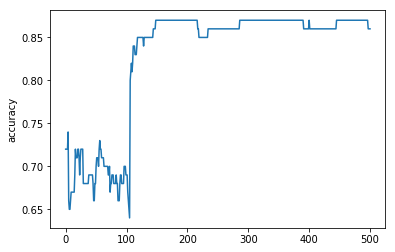

In [17]:
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.ylabel('accuracy')
plt.show()

In [18]:
max_accuracy2 = max(accuracy)
maxLamda_index = np.where(accuracy == max_accuracy2)
print (maxLamda_index)
maxLamda = np.argmax(accuracy)*0.01
print (max_accuracy2, maxLamda)

(array([148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 286, 287, 288, 289, 290, 291, 292, 293, 294,
       295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
       321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333,
       334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346,
       347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359,
       360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372,
       373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385,
       386, 387, 388, 389, 390, 400, 445, 446, 447, 448, 449, 4

In [159]:
R = irl(100, env.PU, env.PD, env.PL, env.PR , 2 , gamma, 100, P2)
estimate_reward = np.asarray(R).reshape(10,10)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7956e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5533e+02 -1.9562e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8213e+02 -1.5725e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.5219e+02 -8.0427e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2699e+02 -6.5420e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.9461e+01 -3.4959e+01  7e+01  5e-05  2e-02  3e-02
 6:  3.1613e-01 -3.4717e-01  7e-01  5e-07  2e-04  4e-04
 7:  3.1610e-03 -3.4712e-03  7e-03  5e-09  2e-06  4e-06
 8:  3.1610e-05 -3.4712e-05  7e-05  5e-11  2e-08  4e-08
 9:  3.1610e-07 -3.4712e-07  7e-07  5e-13  2e-10  4e-10
10:  3.1610e-09 -3.4712e-09  7e-09  5e-15  2e-12  4e-12
Optimal solution found.


In [160]:
def heap_map(reward):
    x = np.arange(11)
    y = np.arange(11)
    X, Y = np.meshgrid(x, y)
    plt.pcolor(X, Y, reward, edgecolors='k', linewidths=0.5 )
    plt.colorbar()
    plt.gca().invert_yaxis()

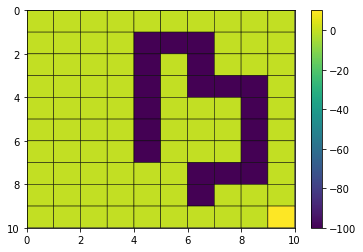

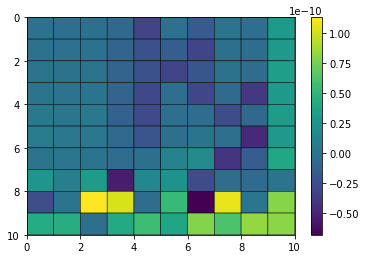

In [161]:
reward_2 = np.zeros((10,10))
reward_2[1,4:7] = -100
reward_2[2:7,4] = -100
reward_2[2:4,6] = -100
reward_2[3,7] = -100
reward_2[3:8,8] = -100
reward_2[7,6:8] = -100
reward_2[8,6] = -100
reward_2[-1,-1] = 10
plt.figure()
heap_map(reward_2)
plt.figure()
heap_map(estimate_reward)

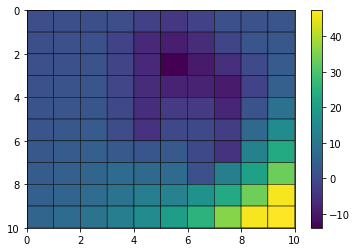

In [162]:
V1 = value_iteration(Environment(w=0.1,disc=gamma),env.reward)
heap_map(value_iteration(Environment(w=0.1,disc=gamma),env.reward))

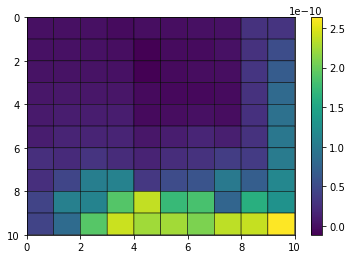

In [163]:
plt.figure()
V = value_iteration_modification(Environment(w=0.1,disc=gamma),R,1)
heap_map(V)

0.88


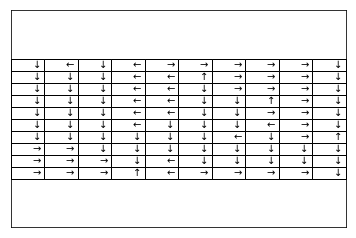

In [165]:
#Q23
#action 0 is 'up'; action 1 is 'down'; action 2 is 'left'; action 3 is 'right'
arrow_dict = {0:'↑', 1:'↓', 2:'←', 3:'→'}
arrow = optimal_policy_m(Environment(w=0.1,disc=gamma),R,V)
arrow = np.asarray(arrow)
arrow_visual = [['↑' for x in range(10)] for y in range(10)]

P = np.asarray(P2)
acc = np.sum(arrow == P)
print (acc/100)

for i in range(arrow.shape[0]):
    for j in range(arrow.shape[1]):
        arrow_visual[i][j] = arrow_dict[arrow[i][j]]

plt.figure()
tb = plt.table(cellText=arrow_visual, loc=(0,0))
tc = tb.properties()['child_artists']
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()